<a href="https://colab.research.google.com/github/philipjpark/P_Park_Project1/blob/main/P_Park_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pima Indian Diabetes**#

#Part 1: Introduction#

The Pima Native Americans are a tribe that settled in the Southwestern part of the United States. Specifially they are located in the Arizona region and parts of Mexico. The United States acquired the Pima territory in 1853. With this takeover, white farmers settled in their land, which ultimately led to a reservation being set up for them in the Salt River area. They currently live in close proximity to the Gila and Salt Rivers near Phoenix, Arizona.

Due to their relocation; their lifestyle, physical activities, and food intake had changed because they were not able to utlize the water sources in the same manner as they did in their previous settlement. Chronic famine set in and a new way of living off the land points to the increase in Diabetes amongst females over 21 years old. This coincides with the timeframe in which they settled and thus we will explore some of the data points and if there is a correlation between any of the characterisitics in the dataset and prevalence of Diabetes amongst women in the Pima tribe. 

For further reading, please refer to:

https://www.legendsofamerica.com/pima-tribe/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/


##Diabetes##

Diabetes is long-lasting health condition that disrupts the body's ability to turn food into energy. Food is normally broken down into glucose and it is released in the bloodstream. Normally, when blood sugar goes up, there is a release of insulin. Insulin acts as a moderator for how blood sugar enters the cells for energy usage. Diabetes either limits insulin production or impedes it altogether. This then overloads the bloodstream with blood sugar. Serious health problems, such as heart disease, vision loss, and kidney disease can develop due to the onset of Diabetes. 

For further reading, please refer to: https://www.cdc.gov/diabetes/basics/diabetes.html



#Part 2: Data Summary#

The Pima Indians Diabetes Dataset relates to characteristics that may relate and correlate to the eventual onset of Diabetes within 5 years of the data being acquired. 

It is a binary (2-class) classification problem. It has an unbalanced number of observations for each class. There are 768 observations with 8 input variables and 1 output variable. The variable names and descriptions are as follows:

1. Pregnancies: Number of times pregnant.

2. Glucose: Plasma glucose concentration within 2 hours in an oral glucose tolerance test.

3. Blood Pressure: Diastolic blood pressure (mm Hg).

4. Skin Thickness:Triceps skinfold thickness (mm).

5. Insulin: 2-Hour serum insulin (mu U/ml).

6. BMI: Body mass index (weight in kg/(height in m)<sup>2</sup>)

7. Diabetes Pedigree Function: Indicates the function which scores likelihood of diabetes based on family history.

8. Age: Years.

9. Outcome: This variable refers to whether or not the woman has diabetes. 0 represents not diabetic and 1 represents that she has it. 

#Exploratory Data Analysis#

A deeper exploration into data analysis creates a burgeoning narrative that can be categorized as 7 data stories. The following is a list of those data stories and its brief descriptions. The EDA will be fashioned around these data stories and I will do my best to sufficiently and effectively incorporate these 7 vital narratives. 

1. **Narrate Change Over Time**- As time elapses, data becomes more robust and trends become clearer to conceptualize. The change over time is an important story to tell because we can see how things change and we can compare it to other historical peaks and valleys. 

2. **Start Big And Drill Down**- Generalizations can help us see an overview of data and allow us to pinpoint key areas that may need a deeper, yet narrow exploration in order to investigate these key areas for potentially important points of emphasis. 

3. **Start Small And Zoom Out**- COnversely, we can start at a given point and see adjacency relationships that allow us to understand the influences of neighboring data and thus we can group them in order to have a better understanding of the "big picture."

4. **Highlight Contrasts**- Highlighting contrasts allow us to see the full spectrum of data in order to see patterns that exists at the poles. These data points allow us to see discrepancies and help with comparisons that relate to large quantities of data that need a proper persepctive in order to gain substantive knowledge. 

5. **Explore The Intersection**- The intersection can give us a story of how connections are made and what led to those points in which the datapoints have a commonality. The reasons for why things occur can be explored intimately by exploring the intersection. 

6. **Dissect The Factors**- The factors allow us to see beyond the numbers. This data story encapsulates the need to exhibit domain, statistical, mathematical, and programming literacy in order to illuminate the factors and why they are influencing the models. 

7. **Profile The Outliers**- Outliers can tell us a lot, and in the world of literature, it is the impetus for deep and profound stories. This holds true for data science as well. Thus, a deep dive into outliers is a fitting way to wrap up the 7 data stories!

#Initializing the Data#

First I imported all the necessary libraries and brought in the dataset with the following code: pd.read_csv("https://raw.githubusercontent.com/philipjpark/P_Park_Project1/main/diabetes.csv")

I used data.head(), data.shape, and data.describe() in order to pull up some preliminary findings. 

In [583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import cycle
from pandas import DataFrame

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

from imblearn.over_sampling import SMOTE
import warnings 
warnings.filterwarnings("ignore")

data = pd.read_csv("https://raw.githubusercontent.com/philipjpark/P_Park_Project1/main/diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [584]:
print("Rows and columns of the dataset: ", data.shape)

Rows and columns of the dataset:  (768, 9)


In [585]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

#Data Preparation#

At this juncture, I am checking to see the Outcome variable because we are testing the various attributes and their relationship to the Outcome variable. 0 indicates "Not Having Diabetes" and 1 indicates "Having Diabetes."

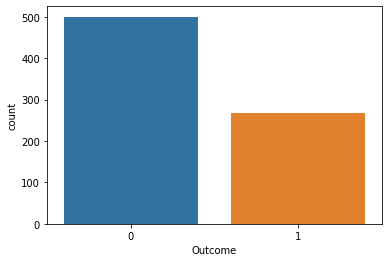

0    500
1    268
Name: Outcome, dtype: int64

In [586]:
simpPlot = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(data['Outcome'])
plt.show()
data['Outcome'].value_counts()

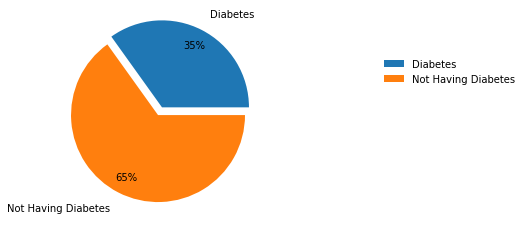

In [587]:
fig, circGraph = plt.subplots()

labels = ['Diabetes', 
         'Not Having Diabetes']
percentages = [34.89, 65.10]
explode=(0.1,0)
circGraph.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', startangle=0, pctdistance=0.8,labeldistance=1.2
       )
circGraph.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

Next, I checked for columns with 0 values. These 0 values would not make sense in the context of this study and thus they must be managed. 

The following columns have this invalid entry:
1. Glucose
2. Blood Pressure 
3. Skin Thickness 
4. Insulin 
5. BMI

Then I created a threshold line that shows which characteristics have missing values that are sub-20% and over-20% of the entire quantity of values.

In [588]:
for col in data.columns:
    print("The minimum value for the columns {} is {}".format(col, data[col].min()))

The minimum value for the columns Pregnancies is 0
The minimum value for the columns Glucose is 0
The minimum value for the columns BloodPressure is 0
The minimum value for the columns SkinThickness is 0
The minimum value for the columns Insulin is 0
The minimum value for the columns BMI is 0.0
The minimum value for the columns DiabetesPedigreeFunction is 0.078
The minimum value for the columns Age is 21
The minimum value for the columns Outcome is 0


In [589]:
def clean_the_data(data, thresh = 20, color = 'green', edgecolor = 'black', height = 3, width = 15):
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=15)
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+3.8, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.8, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
    clean_the_data(data, 20, color=sns.color_palette('Reds',15))

In [590]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

I then replaced the values with nulls, and then replacing those nulls with the median for Insulin and the mean for the other 4 columns (Glucose, Blood Pressure, Skin Thickness, BMI).

I re-represented the findings to show the data cleansing. As you can see, the dataset no longer has missing values. 

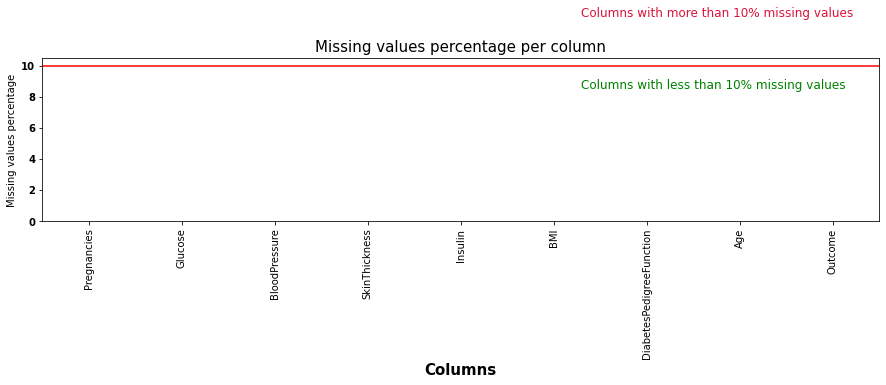

In [591]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    data[col] = data[col].fillna(data[col].mean())

clean_the_data(data, 10, color=sns.color_palette('Blues',15))

For this portion, I used models and plots to exhibit a broad presentation to better understand basic distrbutions and compare some overarching patterns. 

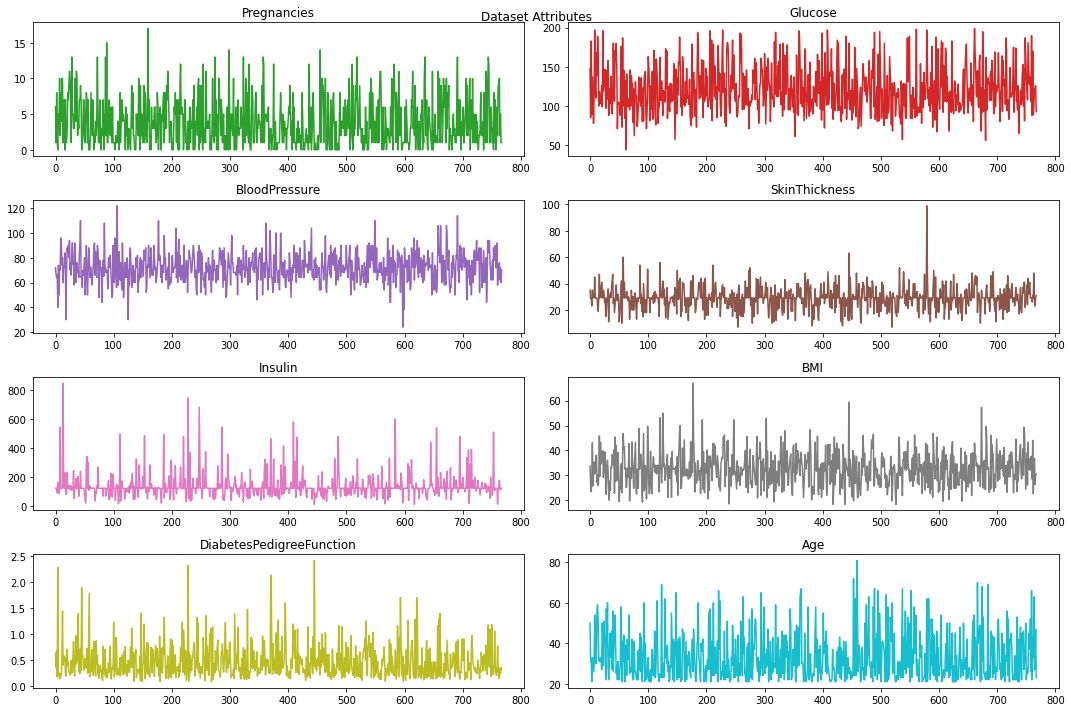

In [592]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = data.drop('Outcome', axis = 1).columns
for col in columns:
    data[col].plot(kind = 'line', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle('Dataset Attributes')
plt.tight_layout()
plt.show()

Next, I incorporated some chi-square statistics. A **chi-square test** can illuminate whether observed results are comparable to expected results. Can we determine if the results stem from chance or are the relationships between the characteristics something that needs to be explored further? 

Degree of freedom refers to the number of independent pieces of information available to compute the given statistic. 

For further reading, please refer to: 

https://www.southampton.ac.uk/passs/full_time_education/bivariate_analysis/chi_square.page#:~:text=A%20chi%2Dsquare%20test%20is,the%20variables%20you%20are%20studying.

https://www.quora.com/What-do-you-mean-by-degrees-of-freedom-associated-with-the-Chi-Square-test

In [593]:
stat, p, dof, expected=chi2_contingency(data)

print('Stat : aka (Chi-Squared Statistics)')
display(stat)
print('====================================')
print('Degree Of Freedom')
display(dof)
print('====================================')
print('Expected')
display(pd.DataFrame(data))

Stat : aka (Chi-Squared Statistics)


26654.470842667142

Degree Of Freedom


6136

Expected


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,125.0,30.1,0.349,47,1


I will engage in a comprehensive study into what these numbers mean and how I can utilize it in my analysis. As of now, I am not too sure how to leverage these findings. 

Next, I used a mean function to group the data as it relates to the all important Outcome variable. I used the distribution plot as separated by those who have Diabetes and those who do not. 

In [594]:
def meanVars(var):
  
    return pd.DataFrame(data.groupby('Outcome').mean()[var])

In [595]:
def distplot(col_name):
    """
    A function that will plot the distribution of column 'col_name' for diabetic and non-diabetic people separately
    """
    plt.figure()
    ax = sns.distplot(data[col_name][data.Outcome == 1], color ="green", rug = True)
    sns.distplot(data[col_name][data.Outcome == 0], color ="lightpink",rug = True)
    plt.legend(['Diabetes', 'Free of Diabetes'])

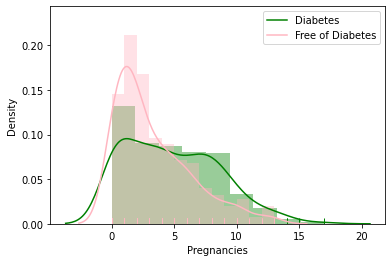

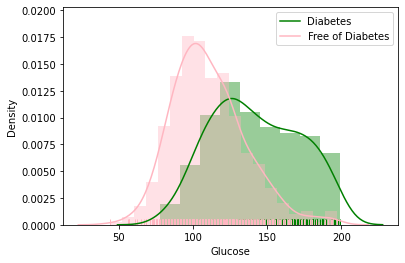

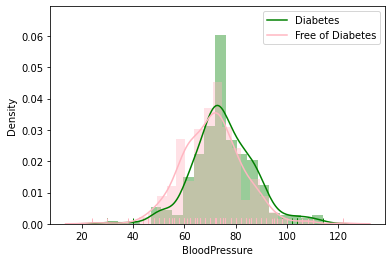

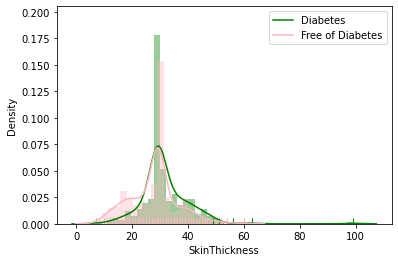

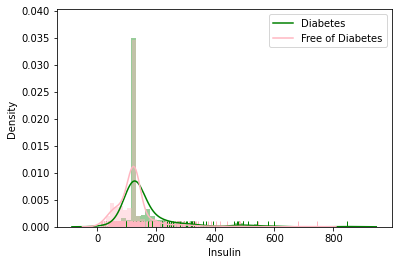

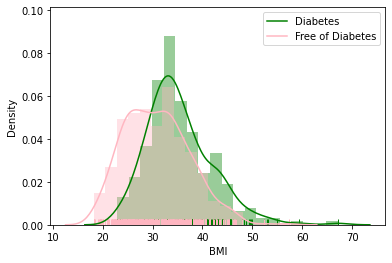

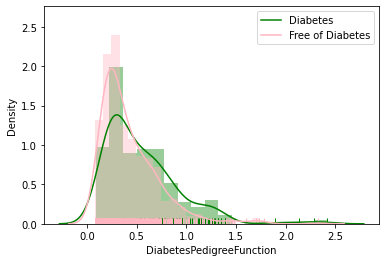

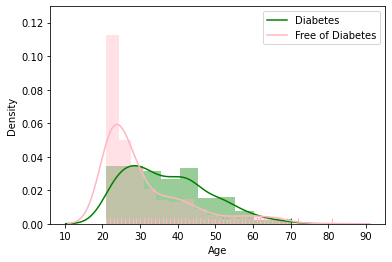

In [596]:
distplot('Pregnancies')
distplot('Glucose')
distplot('BloodPressure')
distplot('SkinThickness')
distplot('Insulin')
distplot('BMI')
distplot('DiabetesPedigreeFunction')
distplot('Age')


In [597]:
print(meanVars('Pregnancies'))
print(meanVars('Glucose'))
print(meanVars('BloodPressure'))
print(meanVars('SkinThickness'))
print(meanVars('Insulin'))
print(meanVars('BMI'))
print(meanVars('DiabetesPedigreeFunction'))
print(meanVars('Age'))


         Pregnancies
Outcome             
0           3.298000
1           4.865672
            Glucose
Outcome            
0        110.710121
1        142.165573
         BloodPressure
Outcome               
0            70.935397
1            75.147324
         SkinThickness
Outcome               
0            27.768651
1            31.736944
            Insulin
Outcome            
0        127.792000
1        164.701493
               BMI
Outcome           
0        30.888434
1        35.384757
         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500
               Age
Outcome           
0        31.190000
1        37.067164


The subsequent information was quite useful:

- 4.86 pregnancies were the average for diabetics 

- 142.166 was the mmHg for blood pressure of diabetics

- the average triceps skin fold thickness was 75.147 mm

- 31.737 mm U/ml was the average Insulin level of a diabetic

- the BMI of a diabetic was 164.701.

The correlation matrix can shed some more light on the findings as well.  

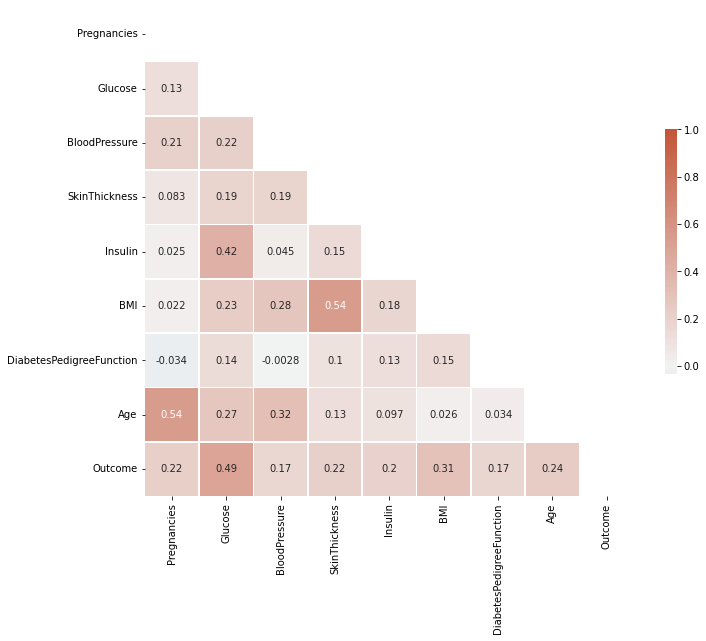

In [598]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

Some of the key factors that I have identified is glucose and insulin. A joint plot can help with further visualization of the data. 

As insulin rises, so does glucose. This seems to be self-evident but the statistics are backing up what we know through modern medical research. 

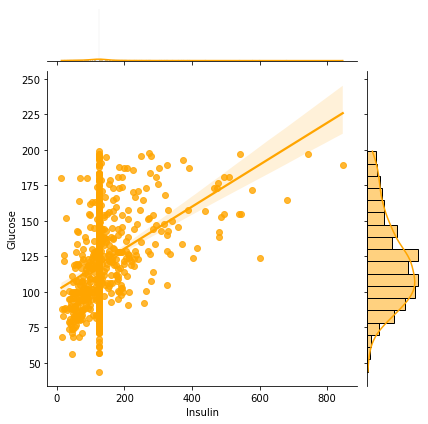

In [599]:
sns.jointplot(x='Insulin',y='Glucose', data=data, kind = 'reg', color = 'orange')
plt.show()

Here are some visualizations with the outcome of Diabetes as compared to Insulin, Skin Thickness, and BMI. 

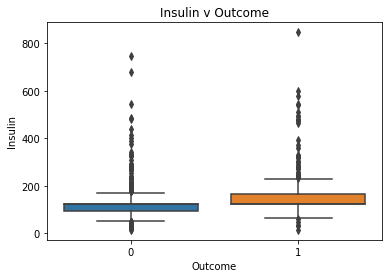

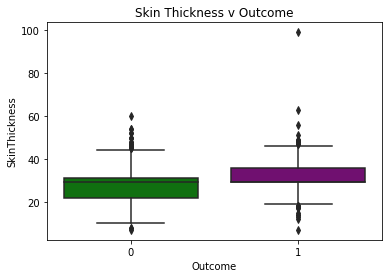

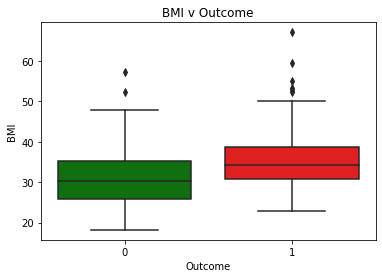

In [600]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data = data)
plt.title('Insulin v Outcome')
plt.show()

skin_plot = {0: "green", 1: "purple"}
sns.boxplot(x = 'Outcome', y = 'SkinThickness', data = data, palette = skin_plot)
plt.title('Skin Thickness v Outcome')
plt.show()

bmi_plot = {0: "green", 1: "red"}
sns.boxplot(x = 'Outcome', y = 'BMI', data = data, palette = bmi_plot)
plt.title('BMI v Outcome')
plt.show()

What follows is now a standardization of the data. We need to center the data. 

According to my research, it is best to have a training set that calculates the mean and variance. This will normalize the set. This can be accomplished by training and variance. This will ultimately take place during the testing timeframe.

Please refer to: 

https://www.kaggle.com/code/chanakyavivekkapoor/eda-and-modelling-diabetes/notebook

In [601]:
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [602]:
sc = StandardScaler()
X_train =  pd.DataFrame(sc.fit_transform(X_train),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test = pd.DataFrame(sc.fit_transform(X_test),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])


Here are some Baseline Models. 

**Baseline models** are simple models that provides context to the results of the trained models. They are not used as a predictive measure but are useful in providing a framework for more complex undertakings.

Please refer to: 

https://towardsdatascience.com/baseline-models-your-guide-for-model-building-1ec3aa244b8d#:~:text=A%20baseline%20model%20is%20essentially,a%20necessity%20for%20many%20reasons.

In [603]:
def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    """
    A function that returns the score of every evaluation metrics
    """
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Next, I ran some logistic regression testing in order to yield a probabilty of an outcome as it relates to the bounded (0 and 1) dependent variable. 

The testing was not necessarily very good because the ranges for F1 scores is as follows:

\> 0.9 Excellent

0.8 - 0.9 Good

0.5 - 0.8 Ok

< 0.5 Bad

Please refer to: https://stephenallwright.com/good-f1-score/


In [604]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)


Train Result:
Accuracy Score: 78.99%
_______________________________________________
F1 Score: 0.66
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.803828    0.753165  0.789931    0.778496      0.786148
recall       0.896000    0.592040  0.789931    0.744020      0.789931
f1-score     0.847415    0.662953  0.789931    0.755184      0.783045
support    375.000000  201.000000  0.789931  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[336  39]
 [ 82 119]]


Test Result:
Accuracy Score: 72.40%
_______________________________________________
F1 Score: 0.56
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.760870   0.629630  0.723958    0.695250      0.715072
recall       0.840000   0.507463  0.723958    0.673731      0.723958
f1-score 

The next task is to improve the testing and try some other models and techniques to garner a more accurate yield. 

The next two models are the **Decision Tree Classifier** and the **Random Tree Classifier**.

The **Decision Tree Classifer** is a supervised Machine Learning method that uses specific rules that oultines decisions.

The **Random Tree Classifier** is a supervised Machine Learning method that builds decision trees from different samples and takes a majority vote with regards to the average and classification in a regressive structure. 

Please refer to the following:

https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

https://towardsdatascience.com/understanding-random-forest-58381e0602d2


In [605]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)

In [606]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

evaluation(dtc, X_train, y_train, X_test, y_test, True)
print()
evaluation(dtc, X_train, y_train, X_test, y_test, False)

train_score_dtc = round(accuracy_score(y_train, dtc.predict(X_train)) * 100, 2)
test_score_dtc = round(accuracy_score(y_test, dtc.predict(X_test)) * 100, 2)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix: 
 [[375   0]
 [  0 201]]


Test Result:
Accuracy Score: 71.35%
_______________________________________________
F1 Score: 0.57
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.765152   0.600000  0.713542    0.682576      0.707521
recall       0.808000   0.537313  0.713542    0.672657      0.713542
f1-score     0.785992   0.566929  0.713542    0.676461      0.70

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix: 
 [[375   0]
 [  0 201]]


Test Result:
Accuracy Score: 73.96%
_______________________________________________
F1 Score: 0.6
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.781955   0.644068  0.739583    0.713011      0.733838
recall       0.832000   0.567164  0.739583    0.699582      0.739583
f1-score     0.806202   0.603175  0.739583    0.704688      0.735

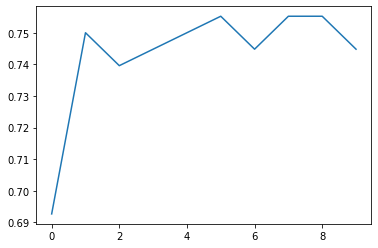

In [607]:
accuracy = []
for i in range(1, 1000, 100):
    rfc = RandomForestClassifier(n_estimators = i, random_state = 0)
    rfc.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, rfc.predict(X_test)))
plt.plot(accuracy)

rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluation(rfc, X_train, y_train, X_test, y_test, False)

In [608]:
train_score_rfc = round(accuracy_score(y_train, rfc.predict(X_train)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test)) * 100, 2)

The Accuracy Score and the F1 Score has improved but it will take more research, analysis, and a build up of my data comprehension to really understand what the numbers mean. 

Next is the implementation of **SMOTE**. 
SMOTE stands for Synthetic Minority Oversampling Technique. It tries to resolve the imbalance problem. It replicates minority classes, then copies it and finally it incorporates it into the data. It randomly selects k-nearest neighbors for each of the minority classes. Then the entire data gets reconfigured to match this synthetic data. 

Please refer to: 

https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/#:~:text=SMOTE%20(synthetic%20minority%20oversampling%20technique)%20is%20one%20of%20the%20most,instances%20between%20existing%20minority%20instances.


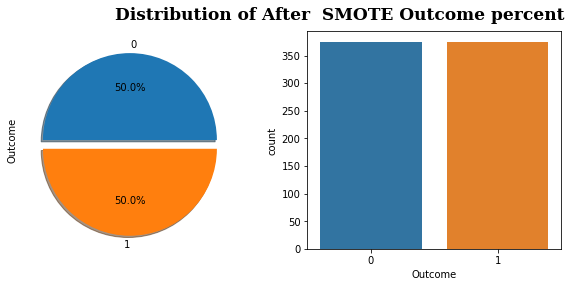

In [609]:
smote = SMOTE()
x_over, y_over = smote.fit_resample(X_train,y_train)

x_over.shape

fig, axes = plt.subplots(1,2,figsize=(10,4))

y_over.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(y_over, ax=axes[1])
axes[1].patch.set_alpha(0)

fig.text(0.28,0.92,"Distribution of After  SMOTE Outcome percent", fontweight="bold", fontfamily='serif', fontsize=17)

plt.show()

Next, is ROC.

**Receiver Operating Characteristic Curve** measures true positive rate in comparison to the false positive rate as it is influenced by various threshold values. It can be used to establish a threshold value based on specificity and how easily swayed the data can be. Proper incorporation of this technique needs proper contextualization. 

Please refer to:

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

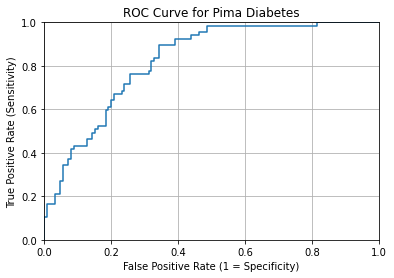

In [610]:
%matplotlib inline

y_pred_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Pima Diabetes')
plt.xlabel('False Positive Rate (1 = Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

**K-Nearest Neighbors** is a supervised machine learning algorithm that assumes that similar things are juxtaposed. In other words, similar things are near to each other. The strategy to select the right "K" is to execute the algorithm several times and choose the K that has the lowest error rate. 

Please refer to:

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

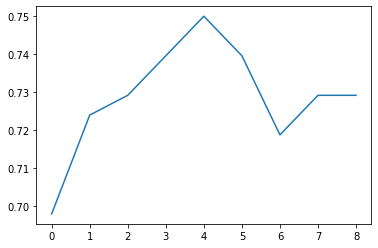

In [611]:
accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))
    
plt.plot(accuracy_scores)

In [612]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

evaluation(knn, X_train, y_train, X_test, y_test, True)
evaluation(knn, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 81.25%
_______________________________________________
F1 Score: 0.72
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.841432    0.751351    0.8125    0.796392      0.809998
recall       0.877333    0.691542    0.8125    0.784438      0.812500
f1-score     0.859008    0.720207    0.8125    0.789608      0.810572
support    375.000000  201.000000    0.8125  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[329  46]
 [ 62 139]]

Test Result:
Accuracy Score: 72.92%
_______________________________________________
F1 Score: 0.59
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.774436   0.627119  0.729167    0.700777      0.723028
recall       0.824000   0.552239  0.729167    0.688119      0.729167
f1-score  

In [613]:
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)

According to my research the Decision Tree Classifier and the Random Tree Classifer has overfitted data and thus you have the exaggerated number of 100 for the train accuracy. 

In [614]:
md = {
           'Train Accuracy': [train_score_lr, train_score_dtc, train_score_rfc, train_score_knn],
          'Test Accuracy' : [test_score_lr, test_score_dtc, test_score_rfc, test_score_knn]
         }

md = pd.DataFrame(md, index = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Nearest Neighbor'])
md.head()

,Train Accuracy,Test Accuracy
Logistic Regression,78.99,72.40
Decision Tree Classifier,100.00,71.35
Random Forest Classifier,100.00,73.96
K-Nearest Neighbor,81.25,72.92


The all-important comparison between the different models and techniques is accomplished through cross-validation. 

**Cross validation** is the technique of quantifying and creating a means to rank the efficacy of models as compared to one another. The evaluation must be taken with a grain of salt because of different conflicting factors. This is due to the nature of the models themselves but nonetheless it provides a means to compare and make a decision on what model best fits based on how the data was prepped. 

Please refer to:

https://towardsdatascience.com/cross-validation-430d9a5fee22#:~:text=Cross%20validation%20is%20a%20technique,complementary%20subset%20of%20the%20data.

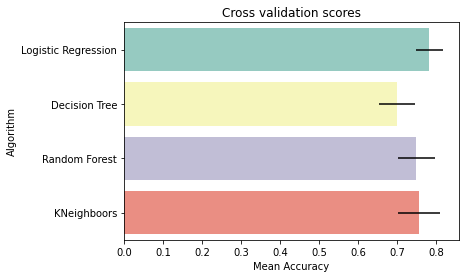

In [615]:
kfold = StratifiedKFold(n_splits=10)

random_state = 0
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state, n_estimators = 500))
classifiers.append(KNeighborsClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Logistic Regression","Decision Tree",
"Random Forest", "KNeighboors"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [616]:
cv_res.head()

,CrossValMeans,CrossValerrors,Algorithm
0,0.783091,0.035100,Logistic Regression
1,0.701270,0.046378,Decision Tree
2,0.750121,0.048499,Random Forest
3,0.757139,0.053968,KNeighboors


#Conclusion#

The Pima Indian Diabetes dataset was a substantial dataset that seemed to point to some relatively obvious conclusions. The leveraging of various models to have a better understanding of what the data is "communicating" to us is something that I want to be able to explore a lot more. Ultimately, it seems as if Logistic Regression is the best model to use but to be honest, many of the findings are still hazy because I am developing my skill-sets as opposed to being anchored with the data literacy. Also, finding the p-values and using those values as part of my data toolbelt is something I am intent on doing in the near future.

BMI, Blood Pressure and of course Insulin are the most influential characteristics and ultimately the conclusions that can be drawn backs up what modern science has been telling us. Our lifestyle and our habits correlate to our health. As an aside, there are interesting results based on the number of times a woman is pregnant and their likelihood of developing Diabetes but once again respecting the data means being proficient in understanding what the models are telling us. This is something that I need to build as I hope to build my proficiency in data analytics. And as another aside, the treatment and the consequential effects of the Pima tribe with respect to their relocation is condemnable. 

#Resources#

https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/

http://mediashift.org/2015/06/exploring-the-7-different-types-of-data-stories/

https://notebook.community/prashantas/MyDataScience/Python/ImputeMissingValues

https://machinelearningmastery.com/arithmetic-geometric-and-harmonic-means-for-machine-learning/#:~:text=The%20arithmetic%20mean%20is%20appropriate,with%20different%20measures%2C%20called%20rates.

https://stackoverflow.com/questions/62522472/gettinng-back-cells-after-being-deleted-in-colab

https://linuxhint.com/find-geometric-mean-pandas/#:~:text=Geometric%20means%20is%20one%20of,numbers%2C%20list%2C%20or%20DataFrame.

https://github.com/mattharrison/ml_pocket_reference/blob/master/ch11.ipynb

https://www.kaggle.com/code/chanakyavivekkapoor/eda-and-modelling-diabetes/notebook


https://www.kaggle.com/code/jerifate/pima-indians-check-the-need-smote-work?scriptVersionId=65617695

http://scott.fortmann-roe.com/docs/BiasVariance.html

https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

http://www.saedsayad.com/model_evaluation_c.htm

https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

https://colab.research.google.com/drive/1iLnrWL0iNELDBskEP1utRRg4ISaqu-57

https://stackoverflow.com/questions/62615608/sum-of-null-and-empty-values-in-pandas-dataframe

https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

https://towardsdatascience.com/pima-indian-diabetes-prediction-7573698bd5fe

https://www.youtube.com/watch?v=EuBBz3bI-aA  (Machine Learning Fundamentals: Bias and Variance)